##Assignment 2

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

# List of CSV file paths
feature_vector_files = ["/content/sample_data/image012_sliding.csv", "/content/sample_data/image012 (1).csv", "/content/sample_data/image01_sliding.csv", "/content/sample_data/image01 (1).csv"]

for vector_file in feature_vector_files:
    # Read the CSV file
    df = pd.read_csv(vector_file)

    # Split the data into training (80%) and testing (20%) sets
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)


    training_file = f"training_data_{feature_vector_files.index(vector_file) + 1}.csv"
    testing_file = f"testing_data_{feature_vector_files.index(vector_file) + 1}.csv"

    # Save the subsets to files
    X_train.to_csv(training_file, index=False)
    X_test.to_csv(testing_file, index=False)


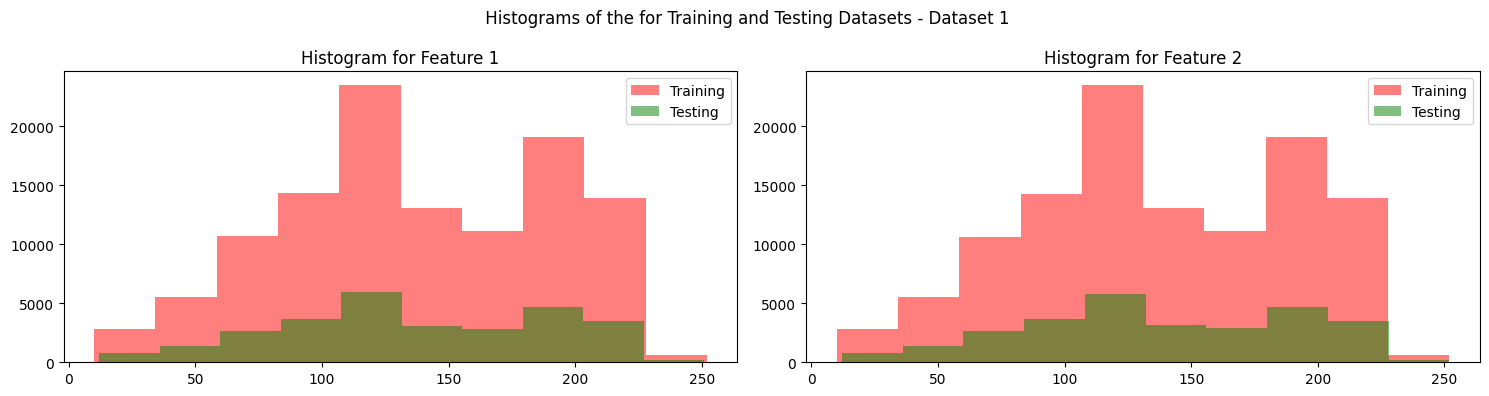

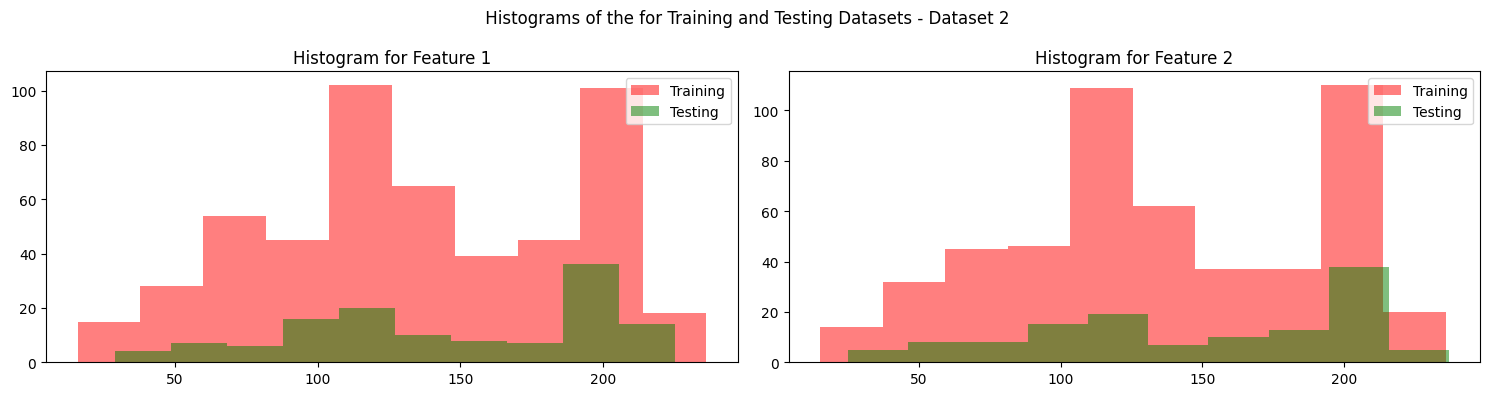

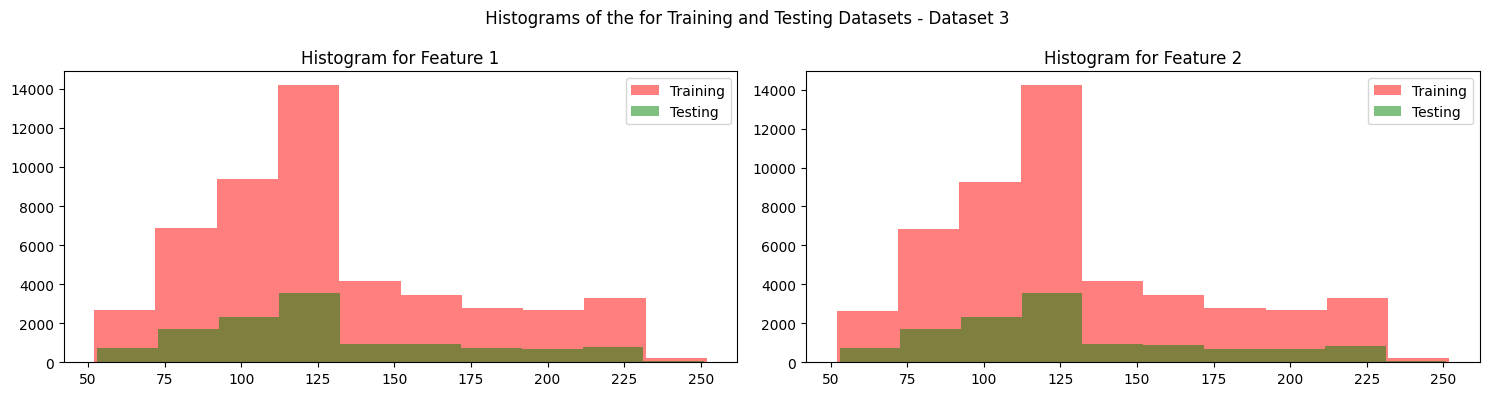

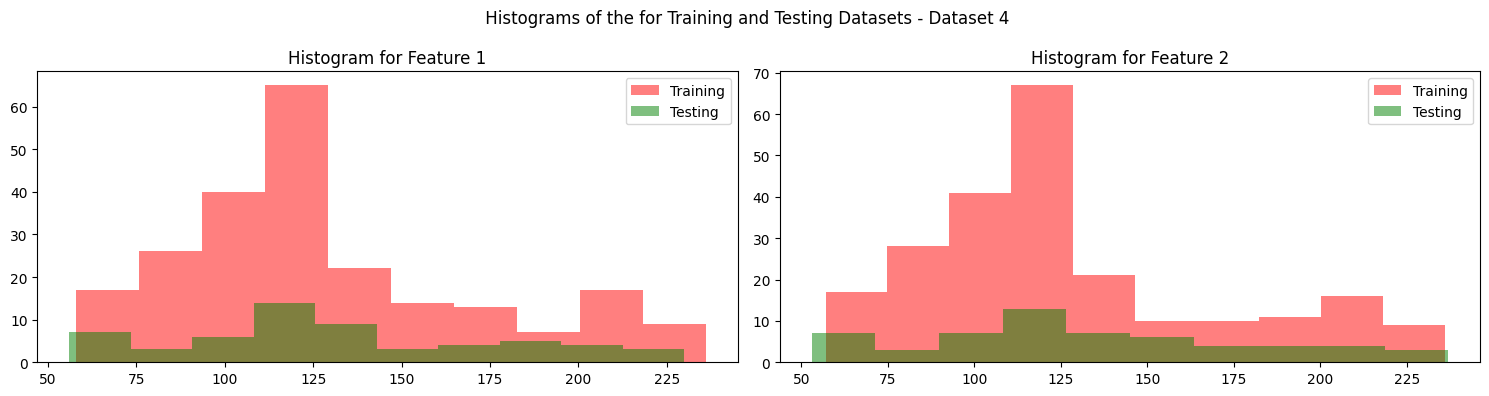

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Define lists of file paths for the training and testing datasets
train_file_paths = ["/content/training_data_1.csv", "/content/training_data_2.csv", "/content/training_data_3.csv", "/content/training_data_4.csv"]
test_file_paths = ["/content/testing_data_1.csv", "/content/testing_data_2.csv", "/content/testing_data_3.csv", "/content/testing_data_4.csv"]

# Specify the names of features you're interested in plotting
features_to_plot = ['1', '2']  # Assuming these are the names of the columns you wish to plot

for index_of_dataset in range(len(train_file_paths)):
    # Load the datasets from the specified file paths
    train_dataset = pd.read_csv(train_file_paths[index_of_dataset])
    test_dataset = pd.read_csv(test_file_paths[index_of_dataset])

    # Set up subplots for each feature you wish to plot
    fig, axes = plt.subplots(1, len(features_to_plot), figsize=(15, 4))

    for feature_index, feature_name in enumerate(features_to_plot):
        # Select the correct axis for the current plot
        ax = axes[feature_index] if len(features_to_plot) > 1 else axes
        # Plot histograms for the current feature from both training and testing datasets
        ax.hist(train_dataset[feature_name], alpha=0.5, label='Training', color='red')
        ax.hist(test_dataset[feature_name], alpha=0.5, label='Testing', color='green')
        ax.set_title(f'Histogram for Feature {feature_name}')
        ax.legend(loc='upper right')

    # Add a common title for the set of subplots
    plt.suptitle(f' Histograms of the for Training and Testing Datasets - Dataset {index_of_dataset + 1}')

    # Adjust subplot layout to minimize overlap
    plt.tight_layout()

    # Display the plotted figure
    plt.show()


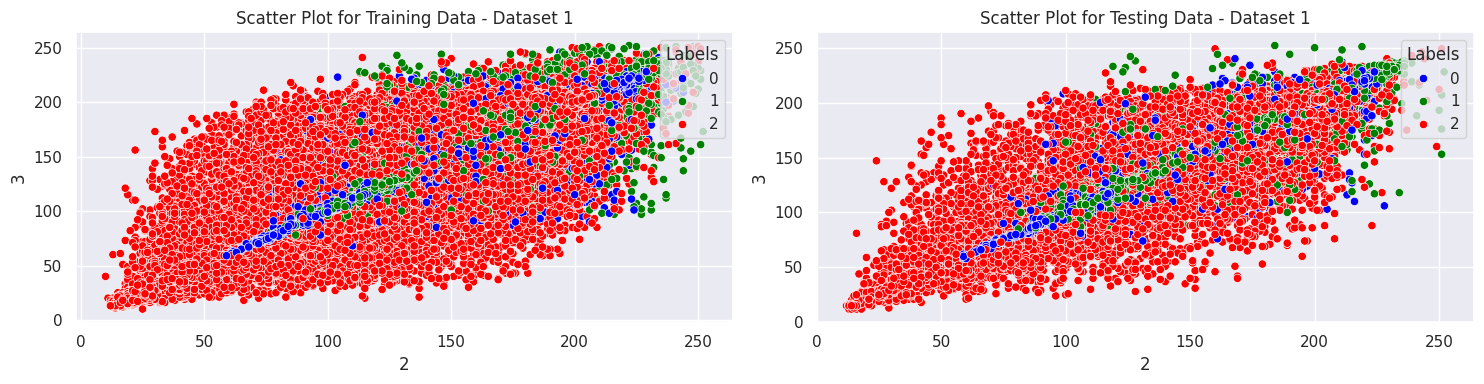

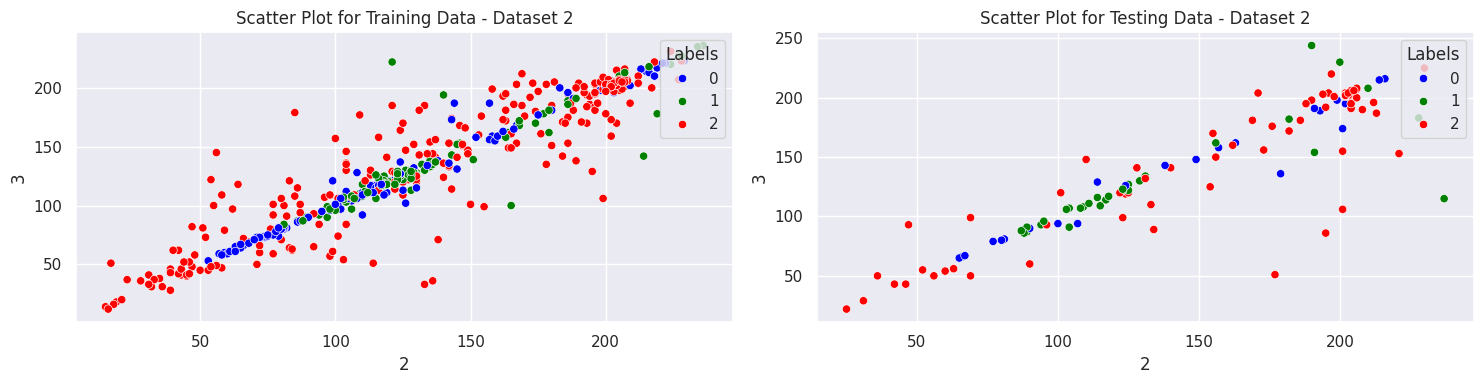

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the list of file names for training and testing data
training_data_files = ["/content/training_data_1.csv", "/content/training_data_2.csv"]
testing_data_files = ["/content/testing_data_1.csv", "/content/testing_data_2.csv"]

# Define the list of label values (change these to match your labels)
labels = [0, 1,2]
palette_color= ["blue", "green", "red"]
# Define styles for the plots
grid_styles = ['darkgrid']

for i in range(len(training_data_files)):
    # Read the training and testing data
    X_train = pd.read_csv(training_data_files[i])
    X_test = pd.read_csv(testing_data_files[i])

    # Create subplots for training and testing data
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    for j, features in enumerate([X_train, X_test]):
        cur_axi = axes[j]

        # Create a scatter plot for all features with labels as hue
        sns.set(style=grid_styles[0])
        sns.scatterplot(data=features, x='2', y='3', hue='label', palette=palette_color, ax=cur_axi)
        cur_axi.set_title(f'Scatter Plot for {"Training" if j == 0 else "Testing"} Data - Dataset {i + 1}')
        cur_axi.legend(loc='upper right', title='Labels')

    # Adjust the layout to avoid overlap
    plt.tight_layout()

    # Show the subplots for this dataset
    plt.show()


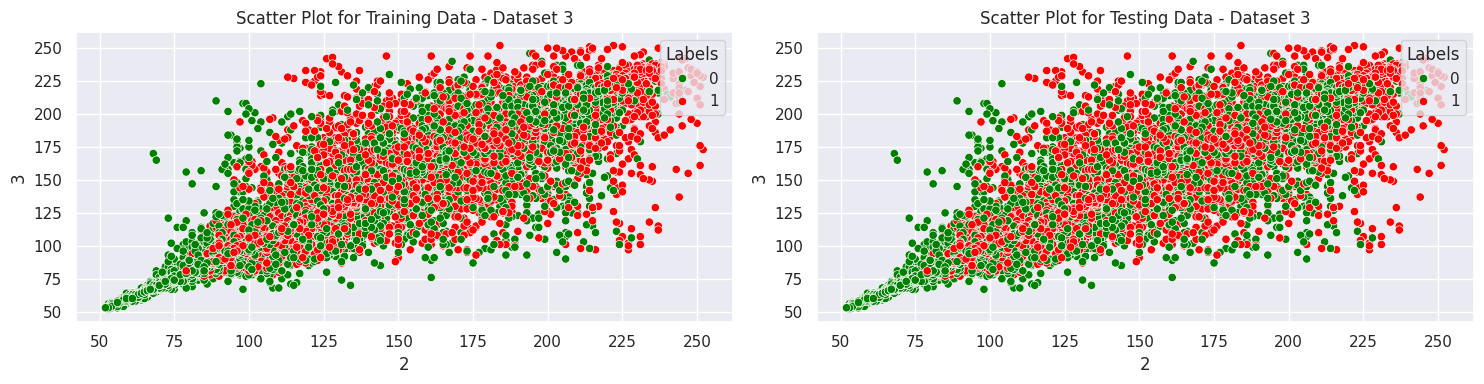

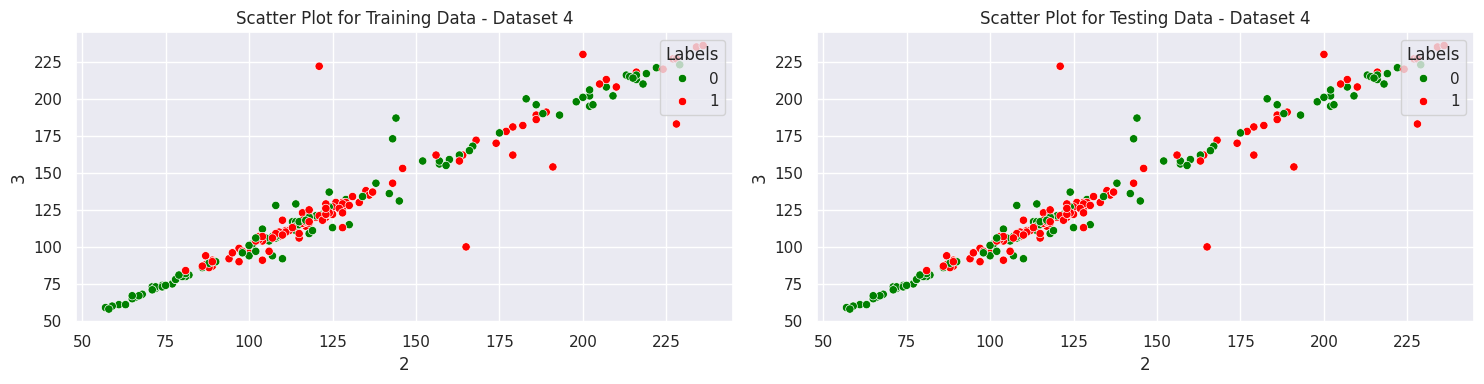

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the list of file names for training and testing data
training_data_files = [ "training_data_3.csv", "training_data_4.csv"]
testing_data_files = [ "testing_data_3.csv", "testing_data_4.csv"]

# Define the styles for the plots
styles = ['darkgrid']
palette_color= [ "green", "red"]
for i in range(len(training_data_files)):
    # Read the training and testing data
    X_train = pd.read_csv(training_data_files[i])
    X_test = pd.read_csv(training_data_files[i])

    # Create subplots for training and testing data
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    for k, feature in enumerate([X_train, X_test]):
        ax = axes[k]

        # Create a scatter plot for binary classification data
        sns.set(style=styles[0])
        sns.scatterplot(data=feature, x='2', y='3', hue='label', palette=palette_color, ax=ax)
        ax.set_title(f'Scatter Plot for {"Training" if k == 0 else "Testing"} Data - Dataset {i + 3}')
        ax.legend(loc='upper right', title='Labels')

    # Adjust the layout to avoid overlap
    plt.tight_layout()

    # Show the subplots for this dataset
    plt.show()


Task 2

**Lasso regression**

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define a list of file names for the datasets
sliding_two_class_classifier = "/content/sample_data/image01_sliding.csv"

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

#for i, csv_file in enumerate(csv_files):
    # Load the dataset
sliding_two_class_classifier_df = pd.read_csv(sliding_two_class_classifier)

# Split the data into training and testing sets
X = sliding_two_class_classifier_df.drop('label', axis=1)  # Features
y = sliding_two_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Convert predicted values to binary class labels
y_pred_binary = [round(value) for value in y_pred]  # Adjust the threshold as needed

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='macro')
recall = recall_score(y_test, y_pred_binary, average='macro')
f1 = f1_score(y_test, y_pred_binary, average='macro')

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Print the results
print(f"Lasso Model - Dataset { 1}")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Lasso Model - Dataset 1
Accuracy: 0.5258925699581859
Precision: 0.5260506694291632
Recall: 0.5253104527933671
F1 Score: 0.52220854786687
Confusion Matrix:
[[3816 2445]
 [3451 2724]]


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define a list of file names for the datasets
non_sliding_two_class_classifier = "/content/sample_data/image01 (1).csv"

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

#for i, csv_file in enumerate(csv_files):
    # Load the dataset
non_sliding_two_class_classifier_df = pd.read_csv(non_sliding_two_class_classifier)

# Split the data into training and testing sets
X = non_sliding_two_class_classifier_df.drop('label', axis=1)  # Features
y = non_sliding_two_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Convert predicted values to binary class labels
y_pred_binary = [round(value) for value in y_pred]  # Adjust the threshold as needed

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='macro')
recall = recall_score(y_test, y_pred_binary, average='macro')
f1 = f1_score(y_test, y_pred_binary, average='macro')

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Print the results
print(f"Lasso Model - Dataset { 1}")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Lasso Model - Dataset 1
Accuracy: 0.4827586206896552
Precision: 0.48043184885290147
Recall: 0.48275862068965514
F1 Score: 0.46691176470588236
Confusion Matrix:
[[19 10]
 [20  9]]


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define a list of file names for the datasets
sliding_three_class_classifier = "/content/sample_data/image012_sliding.csv"

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

sliding_three_class_classifier_df = pd.read_csv(sliding_three_class_classifier)

# Split the data into training and testing sets
X = sliding_three_class_classifier_df.drop('label', axis=1)  # Features
y = sliding_three_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Convert predicted values to binary class labels
y_pred_binary = [round(value) for value in y_pred]  # Adjust the threshold as needed

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='macro')
recall = recall_score(y_test, y_pred_binary, average='macro')
f1 = f1_score(y_test, y_pred_binary, average='macro')

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Print the results
print(f"Lasso Model - Dataset { 1}")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Lasso Model - Dataset 1
Accuracy: 0.3124934621151365
Precision: 0.3186741598696043
Recall: 0.37298167006336586
F1 Score: 0.23008875657757674
Confusion Matrix:
[[    0  5420   761]
 [    0  5643   519]
 [    0 13017  3319]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define a list of file names for the datasets
non_sliding_three_class_classifier = "/content/sample_data/image012 (1).csv"

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

non_sliding_three_class_classifier_df = pd.read_csv(non_sliding_three_class_classifier)

# Split the data into training and testing sets
X = non_sliding_three_class_classifier_df.drop('label', axis=1)  # Features
y = non_sliding_three_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Convert predicted values to binary class labels
y_pred_binary = [round(value) for value in y_pred]  # Adjust the threshold as needed

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, average='macro')
recall = recall_score(y_test, y_pred_binary, average='macro')
f1 = f1_score(y_test, y_pred_binary, average='macro')

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Print the results
print(f"Lasso Model - Dataset { 1}")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Lasso Model - Dataset 1
Accuracy: 0.3984375
Precision: 0.3508480212836715
Recall: 0.3999116217410517
F1 Score: 0.2944711538461538
Confusion Matrix:
[[ 0 21  3]
 [ 0 27  4]
 [ 0 49 24]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random forest**

Random forest for 2 class classifier for sliding data

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Define a list of file names for the datasets

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

sliding_two_class_classifier = "/content/sample_data/image01_sliding.csv"
sliding_two_class_classifier_df = pd.read_csv(sliding_two_class_classifier)
X = sliding_two_class_classifier_df.drop('label', axis=1)  # Features
y = sliding_two_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = f1_score(y_test, y_pred, average='macro')

# Construct and print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)

Random Forest Classifier Results:
Accuracy: 0.9958185911868768
Precision: 0.9958155721014517
Recall: 0.9958217278480563
F1 Score: 0.995818418141839
Confusion Matrix:
[[6232   29]
 [  23 6152]]


Random forest for 2 class classifier for non sliding data

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Define a list of file names for the datasets

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

non_sliding_two_class_classifier = "/content/sample_data/image01 (1).csv"
non_sliding_two_class_classifier_df = pd.read_csv(non_sliding_two_class_classifier)
X = non_sliding_two_class_classifier_df.drop('label', axis=1)  # Features
y = non_sliding_two_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = f1_score(y_test, y_pred, average='macro')

# Construct and print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)

Random Forest Classifier Results:
Accuracy: 0.8275862068965517
Precision: 0.8275862068965517
Recall: 0.8275862068965517
F1 Score: 0.8275862068965517
Confusion Matrix:
[[24  5]
 [ 5 24]]


Random forest for 3 class classifier for  sliding data

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Define a list of file names for the datasets

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

sliding_three_class_classifier = "/content/sample_data/image012_sliding.csv"
sliding_three_class_classifier_df = pd.read_csv(sliding_two_class_classifier)
X = sliding_three_class_classifier_df.drop('label', axis=1)  # Features
y = sliding_three_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = f1_score(y_test, y_pred, average='macro')

# Construct and print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)

Random Forest Classifier Results:
Accuracy: 0.9958185911868768
Precision: 0.9958155721014517
Recall: 0.9958217278480563
F1 Score: 0.995818418141839
Confusion Matrix:
[[6232   29]
 [  23 6152]]


Random forest for 3 class classifier for non sliding data

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Define a list of file names for the datasets

# Define the alpha (regularization strength) for the Lasso model
alpha = 1.0  # You can adjust this as needed

non_sliding_three_class_classifier = "/content/sample_data/image012(1).csv"
non_sliding_three_class_classifier_df = pd.read_csv(non_sliding_two_class_classifier)
X = non_sliding_three_class_classifier_df.drop('label', axis=1)  # Features
y = non_sliding_three_class_classifier_df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1_score = f1_score(y_test, y_pred, average='macro')

# Construct and print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)

Random Forest Classifier Results:
Accuracy: 0.8275862068965517
Precision: 0.8275862068965517
Recall: 0.8275862068965517
F1 Score: 0.8275862068965517
Confusion Matrix:
[[24  5]
 [ 5 24]]
